# 1)Importing all the dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.utils import io


## 2)Importing the data set into a pandas dataframe

In [6]:
url = 'https://github.com/3Vikram-K/Heart_disease_prediction/blob/main/heart.csv'+'?raw=true'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## 3)Lets check the dataset for null values

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 4)Viewing the Dimensions of the dataset

In [9]:
df.shape

(303, 14)

## 5)Analysing few statistical features of the dataset

In [10]:
correlations = df.corr()
correlations

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


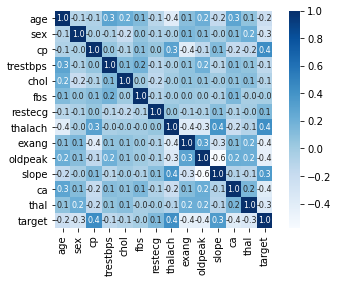

In [11]:
#plotting all the correlations on a heat map
sns.heatmap(correlations,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [12]:
#Checking the distinct values and frequency of those values for every column in the dataset
for i in df.columns:
    print(df[i].value_counts())

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, 

### The above cell shows that the data is natural and evenly distributed and is not biased therefore requering no further preprocessing or transformations.

## 6)Dropping unnecessary features(according to the heat map fbs has no affect on target variable)

In [13]:
df = df.drop(['fbs'],axis = 1)
df

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,1,115,1,1.2,1,1,3,0


## 7) Plotting some graphs for model selection

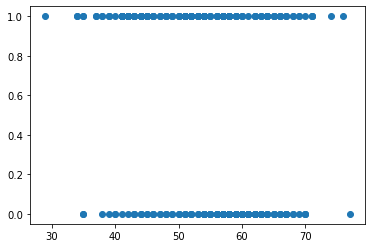

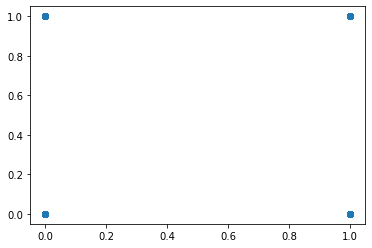

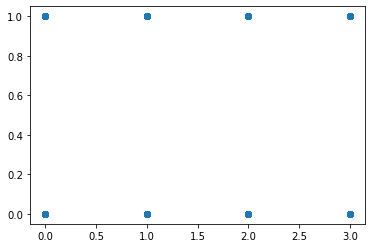

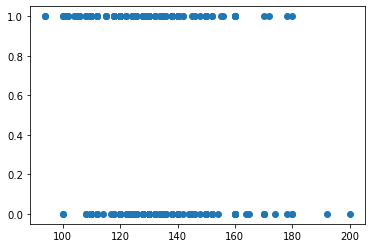

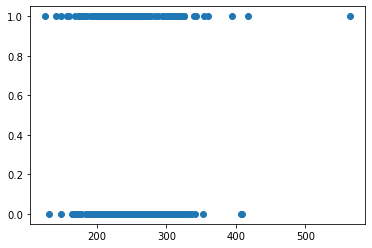

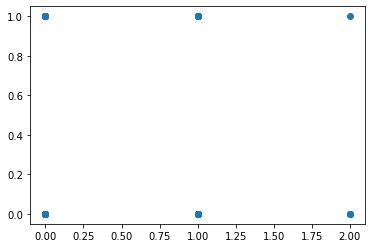

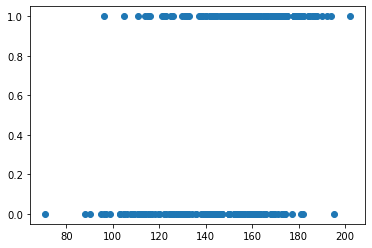

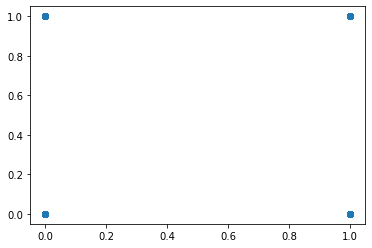

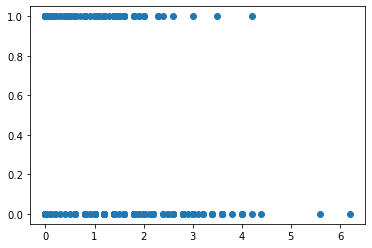

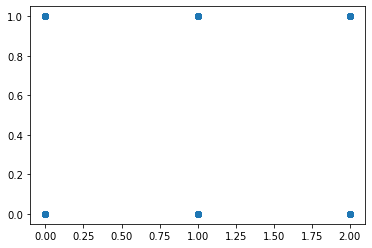

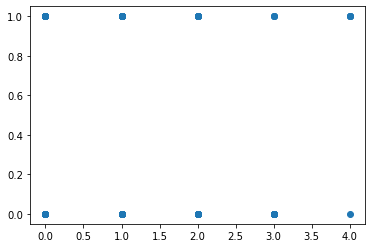

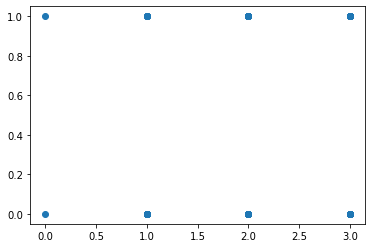

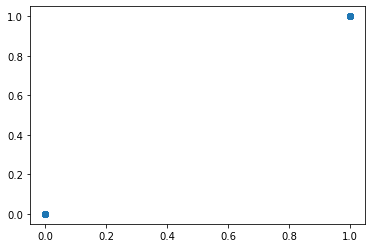

In [14]:
#Plotting the graph for every column against the target variable
for i in df.columns:
    plt.scatter(df[i],df['target'])
    plt.show()

### Since the dataset only contains discrete values that rather than continuous values and the target variable also is a binary classification case, logistic regression model might be best suitable for this dataset.

## 8)Lets split the data into training set and test set

In [15]:
x = df.drop(['target'],axis = 1)
y = df[['target']]

In [16]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.2,stratify=y,random_state=9)

## 9)Training the Logistic Regression model

In [17]:
regr = LogisticRegression()

In [18]:
regr.fit(trainx,trainy)

C:\3Vikram\Compilers_and_Interpreters\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\3Vikram\Compilers_and_Interpreters\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 10)Evaluating the ML model by predicting the target variable and calculating the accuracy of the predictions

In [19]:
#Predicting the target variable for training and test sets
proto_y = regr.predict(trainx)
predictions = regr.predict(testx)

In [20]:
#Calculating the accuracy for both the predcictions
a1 = accuracy_score(trainy,proto_y)
a2 = accuracy_score(testy,predictions)
print(f'The accuracy score for \nTraining set : {a1}\nTest set : {a2}')

The accuracy score for 
Training set : 0.8512396694214877
Test set : 0.8360655737704918


## 11)Plotting the few graphs to visualize the model accuracy

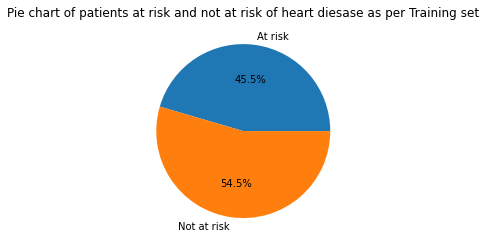

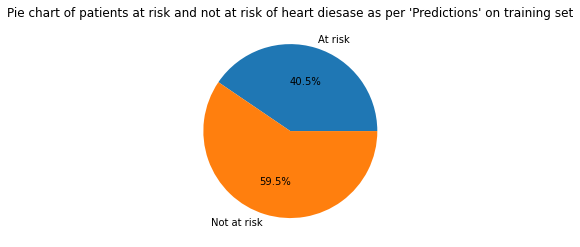

In [21]:
#Plotting actual values in the training set
yes = 0
no = 0
for i in trainy['target']:
    if i == 0:
        yes = yes + 1
    else:
        no = no + 1
piechart = plt.pie([yes,no],labels = ['At risk','Not at risk'],autopct='%1.1f%%')
plt.title("Pie chart of patients at risk and not at risk of heart diesase as per Training set")
plt.show()

#Plotting the predicted values on training set
yes = 0
no = 0
for i in proto_y:
    if i == 0:
        yes = yes + 1
    else:
        no = no + 1
piechart = plt.pie([yes,no],labels = ['At risk','Not at risk'],autopct='%1.1f%%')
plt.title("Pie chart of patients at risk and not at risk of heart diesase as per 'Predictions' on training set")
plt.show()


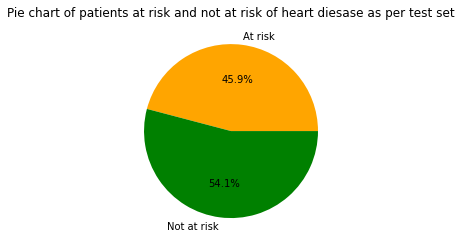

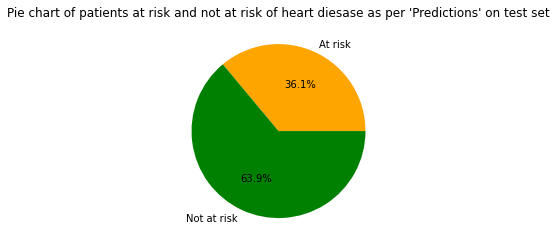

In [22]:

#Plotting the actual values in the test set
yes = 0
no = 0
for i in testy['target']:
    if i == 0:
        yes = yes + 1
    else:
        no = no + 1
piechart = plt.pie([yes,no],labels = ['At risk','Not at risk'],colors= ['orange','green'],autopct='%1.1f%%')
plt.title("Pie chart of patients at risk and not at risk of heart diesase as per test set")
plt.show()

#Plotting the predicted values on test set
yes = 0
no = 0
for i in predictions:
    if i == 0:
        yes = yes + 1
    else:
        no = no + 1
piechart = plt.pie([yes,no],labels = ['At risk','Not at risk'],colors= ['orange','green'],autopct='%1.1f%%')
plt.title("Pie chart of patients at risk and not at risk of heart diesase as per 'Predictions' on test set")
plt.show()


## 12)A predicting system that predicts result for any given input

In [23]:
data = input("Please enter the inputs for age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal\nIgnore fbs\n=> ")
data = data.split(',')
data.pop(5)
print('Given input data is : ',data)
data = np.asanyarray(data)
data = data.reshape(1,-1)
with io.capture_output() as captured:
    result = regr.predict(data);
if result[0] == 1:
    print("The patient is 'at the risk' of Heart diesase.")
else:
    print("The patient is 'not at risk' of heart disease.")


Given input data is :  ['55', '1', '0', '160', '289', '0', '145', '1', '0.8', '1', '1', '3']
The patient is 'not at risk' of heart disease.


# Author - **Kammara Trivikram** 